# Frontiers
Notebook for constructing malaria cases across the different international frontiers

In [1]:
import sys
sys.path.append('../src/')


In [16]:
# Useful imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from constants import *
from utils.publication_functions import beautify_data_column_name
from sklearn.cluster import KMeans
from flows.specific.custom_flow import CustomFlow

# Data sources
from data_sources.specific.coca import Coca
from data_sources.specific.gold_stock_price import GoldStockPrice
from data_sources.specific.malaria_cases import Malaria
from data_sources.specific.malaria_cases_sivigila_4 import MalariaSivigila4
from data_sources.specific.mock_malaria_cases import MockMalaria
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.temperature_max import TemperatureMax
from data_sources.specific.temperature_min import TemperatureMin
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.precipitation_average import PrecipitationAverage
from data_sources.specific.precipitation_total import PrecipitationTotal
from data_sources.specific.deforestation_average import DeforestationAverage
from data_sources.specific.deforestation_total import DeforestationTotal
from data_sources.specific.fb_mobility import FBMobility

# Embedders
from embedders.specific.identity_embedder import IdentityEmbbeder
from embedders.specific.linear_regression_coefficient_embedder import LinearRegressionCoefficientEmbedder
from embedders.specific.mobility_to_distance_embedder import MobilityToDistanceEmbeder
from embedders.specific.mobility_to_similarity_embedder import MobilityToSimilarityEmbeder

# Clusteres
from clusterers.specific.identity_clusterer import IdentityClusterer
from clusterers.specific.sklearn_vector_clusterer import SklearnVectorClusterer
from clusterers.specific.two_tier_dbscan_clusterer import TwoTierDBSCANClusterer
from clusterers.specific.similarity_community_clusterer import SimilarityCommunityClusterer

# Geographies
from geography.specific.colombian_municipalities import ColombianMunicipalities
from geography.specific.colombian_frontiers import ColombianFrontiers
from geography.general.geography_from_flow_output import GeographyFromFlowOutput

pd.set_option('display.max_rows', 100)



## 1. Compute Malaria

In [20]:

included_sources = [MalariaSivigila4]
included_matrix_sources = []

flow = CustomFlow(ID = 'malaria_by_frontier',
                    name = "Malaria By Frontier",
                    time_resolution = MONTH,
                    geography = ColombianFrontiers(),
                    vector_data_sources=included_sources,
                    matrix_data_sources=included_matrix_sources)

flow.run()

               Starts Flow: Malaria By Frontier
                  Loads Initial Geography
                  Loads Data
                     Loads Vector Data
                     Found 1 elements
                        Extracts 1 of 1: Malaria (malaria_sivigila_4) 
                        Loads Data
                        Builds Overlay
                        By Dates. From 2006 to 2021
                           2006-01-08T00:00:00.000000000
                           2006-01-15T00:00:00.000000000
                           2006-01-22T00:00:00.000000000
                           2006-01-29T00:00:00.000000000
                           2006-02-05T00:00:00.000000000
                           2006-03-05T00:00:00.000000000
                           2006-03-12T00:00:00.000000000
                           2006-04-16T00:00:00.000000000
                           2006-04-23T00:00:00.000000000
                           2006-04-30T00:00:00.000000000
                           2006-05-07

## Visualize

Text(0, 0.5, 'Casos Malaria (Mensuales)')

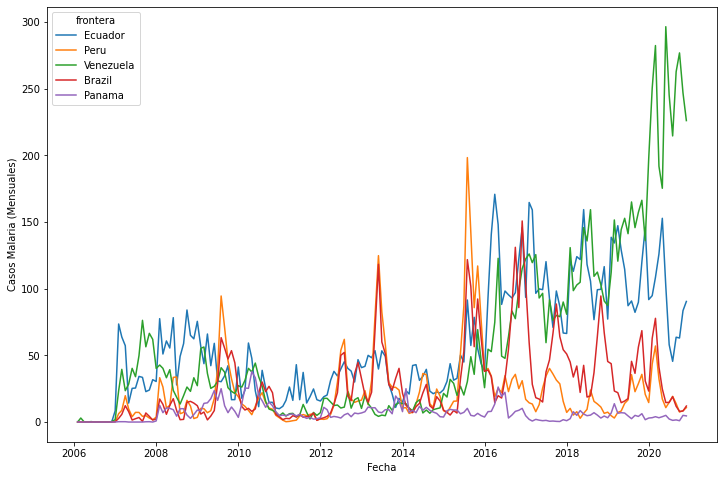

In [26]:
df = flow.df_embedded_vector.merge(flow.initial_geometry)
#display(df)
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data = df[df.date <= pd.to_datetime("2020-11-30")], x = 'date', y = 'malaria_sivigila_4_num_cases_sum', hue = 'frontera')
ax.set_xlabel('Fecha')
ax.set_ylabel('Casos Malaria (Mensuales)')

In [10]:
flow.final_geometry.shape

(5, 2)

<AxesSubplot:>

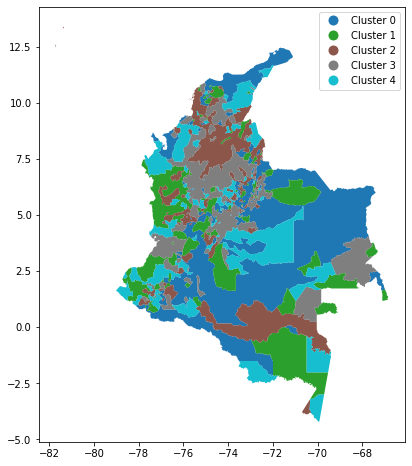

In [15]:
flow.final_geometry[CLUSTER_ID] = flow.final_geometry[ID].apply(lambda i : f"Cluster {i}")
flow.final_geometry.plot(column = CLUSTER_ID, figsize = (8,8), legend = True)

In [23]:
pd.DataFrame(np.round(flow.clusterer.sklearn_clusterer.cluster_centers_,2), columns =  [ beautify_data_column_name(col) for col in flow.df_embedded_vector.columns[1:]])

,Coca,Average Deforestation,Gold Stock Price,Average Precipitation,Average Temperature
0,-0.07,0.17,-0.53,0.03,-0.14
1,-0.21,-0.24,0.02,0.10,0.24
2,0.15,-0.16,0.30,0.02,-0.16
3,-0.19,0.47,-0.03,0.07,-0.06
4,0.55,-0.02,-0.14,0.02,0.03


### Map By Factor 

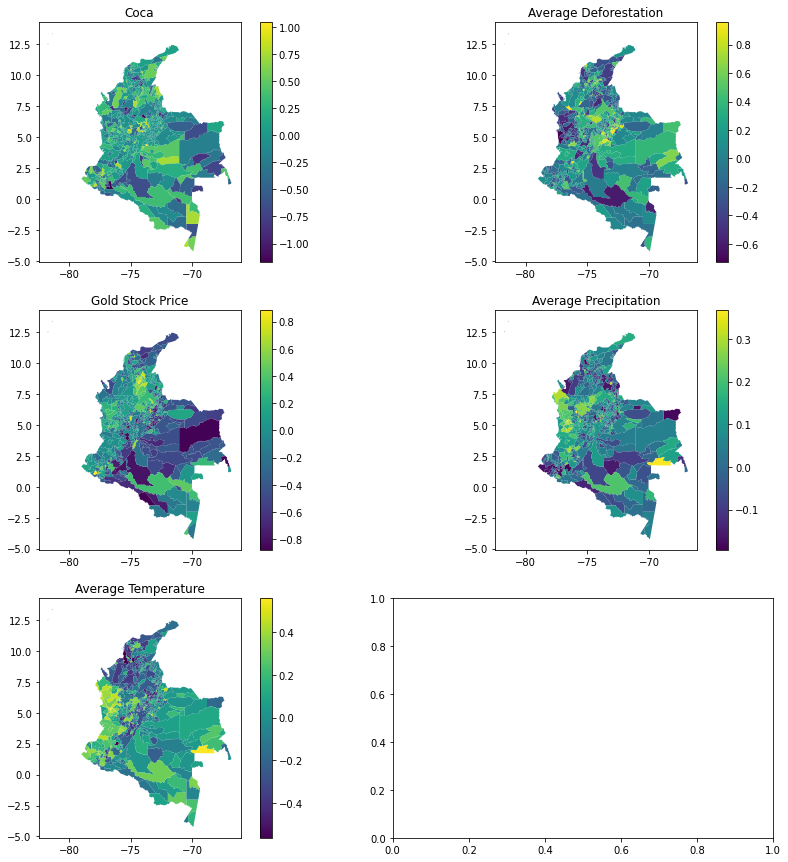

In [12]:
cols = int(np.floor(np.sqrt(flow.df_embedded_vector.shape[1] - 1)))
rows = int(np.ceil((flow.df_embedded_vector.shape[1] - 1)/cols))

fig, axs = plt.subplots(ncols=cols,nrows=rows, figsize=(15,15))

i = 0

for col in flow.df_embedded_vector.columns:
    if col != "ID":
        ax = axs[int(np.floor(i / 2)), i % 2]
        temp_geom = flow.initial_geometry.merge(flow.df_embedded_vector[["ID", col]])
        temp_geom.plot(column = col, figsize = (8,8), legend=True, ax=ax)
        ax.set_title(beautify_data_column_name(col))
        i += 1


coca_coca_total
deforestation_average_deforestation_average
gold_stock_price_value
precipitation_average_precipitation_average
temperature_mean_temperature_average


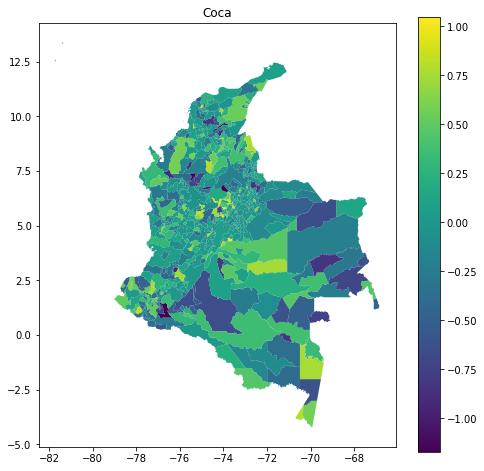

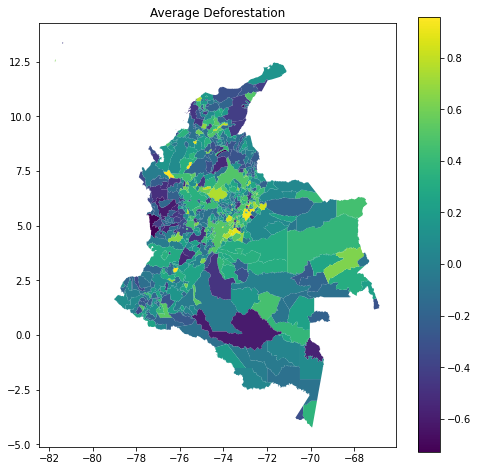

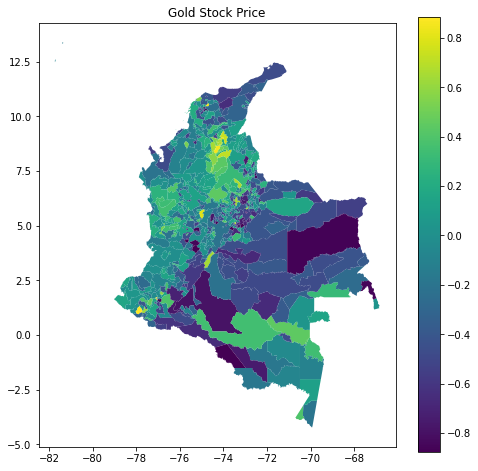

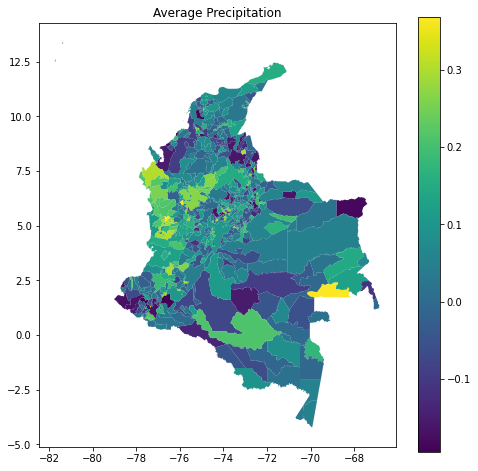

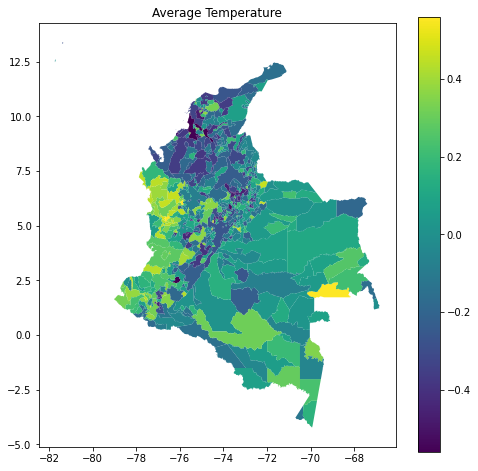

In [13]:
for col in flow.df_embedded_vector.columns:
    if col != "ID":
        temp_geom = flow.initial_geometry.merge(flow.df_embedded_vector[["ID", col]])
        ax = temp_geom.plot(column = col, figsize = (8,8), legend=True)
        ax.set_title(beautify_data_column_name(col))
        print(col)
        #i += 1

In [ ]:
df = pd.DataFrame(flow.clusterer.sklearn_clusterer.cluster_centers_)
df.columns = flow.df_embedded_vector.columns[1:]
df.reset_index(inplace = True)
df.rename(columns = {'index' : 'Cluster'}, inplace = True)
display(df)


,Cluster,coca_coca_total,deforestation_average_deforestation_average,gold_stock_price_value,precipitation_average_precipitation_average,temperature_mean_temperature_average
0,0,-0.101211,0.424336,0.125846,0.072272,-0.066822
1,1,-0.503721,0.068428,-0.337788,0.028830,0.064394
2,2,-0.008872,-0.236051,0.155161,0.075245,0.065196
3,3,0.638020,0.005926,0.063664,0.005972,-0.012508
4,4,0.043708,0.256782,-0.486181,0.048517,-0.129519


<AxesSubplot:>

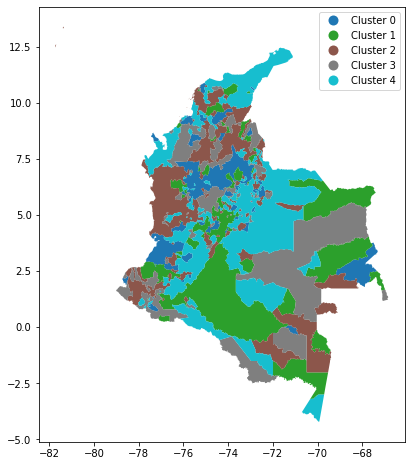

In [ ]:

flow.final_geometry[CLUSTER_ID] = flow.final_geometry[ID].apply(lambda i : f"Cluster {i}")
flow.final_geometry.plot(column = CLUSTER_ID, figsize = (8,8), legend=True)



In [ ]:
import pandas as pd
import geopandas
from shapely import wkt



df = pd.read_csv('temp.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'temp.csv'

In [ ]:
df.geometry.area
df['geometry'] = geopandas.GeoSeries.from_wkt(df['geometry'])
df = geopandas.GeoDataFrame(df, geometry='geometry')

In [ ]:
df.groupby(['ID','date']).agg({'temperature_average':'sum'})

temperature_average
ID date                           
0  2000-01-31         7.547021e+12
   2000-02-29         7.556233e+12
   2000-03-31         7.558390e+12
   2000-04-30         7.567763e+12
   2000-05-31         7.570924e+12
...                            ...
4  2019-09-30         1.221955e+12
   2019-10-31         1.215479e+12
   2019-11-30         1.217132e+12
   2019-12-31         1.219647e+12
   2020-01-31         1.218335e+12

[1205 rows x 1 columns]